<a href="https://colab.research.google.com/github/maazali04/algorithms/blob/main/linear_regression/01_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Step by Step Explanation of LinearRegression

We are given data points. We want a line that best explains them.

In [115]:
import numpy as np

x = np.array([1,2,3,4,5])
y = np.array([2.0,3.5,6.3,8.4,9.8])

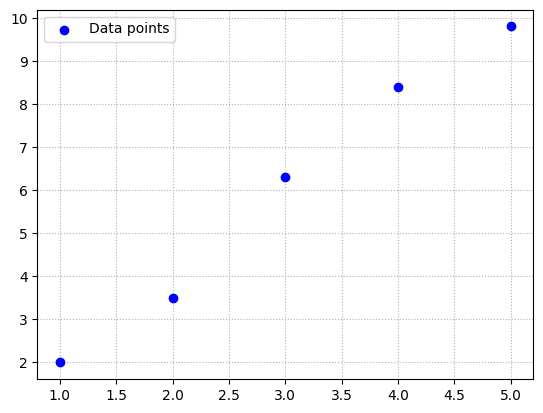

In [97]:
import matplotlib.pyplot as plt

plt.scatter(x,y, c = "blue", label = "Data points", zorder = 2)
plt.legend()
plt.grid(linestyle=":", zorder = 1)

Model Hypothesis

$$\hat y = wx + b $$

Where:
- $w$ represent slope
- $b$ represent bias

Since the true slope and intercept are unknown, we’ll start with random values. <br> For now, let’s initialize both w and b to 0.

In [116]:
w = 0
b = 0

# y_pred = wx + b
y_pred = w * x + b
y_pred

array([0, 0, 0, 0, 0])

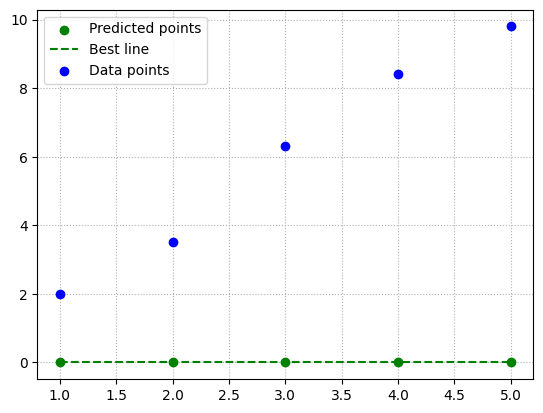

In [99]:
plt.scatter(x,y_pred, c= "green", label = "Predicted points", zorder = 3)
plt.plot([x[0],x[-1]],[y_pred[0],y_pred[-1]], c= "green", linestyle="--", label="Best line")
plt.scatter(x,y, c = "blue", label = "Data points", zorder = 2)
plt.legend()
plt.grid(linestyle=":", zorder = 1)

This is a line, but not the best line.

The line of best fit is the mathematical representation that minimizes the total error, or loss, between the predicted values and the actual data points.

$$j(w,b) =  \frac 1 n \sum (y - \hat y )^2$$

In [117]:
n = len(x)
loss = (1 / n) * (np.sum((y - y_pred) ** 2))
loss

np.float64(44.50800000000001)

Here loss is 44.5. <br>
Our goal is to lower the loss. We use gradients to figure out the best direction to move in.

$$\frac {\partial J} {\partial w} = - \frac 2 n \sum_{i = 1}^n x_i(y_i - \hat y_i)$$

<br>

$$\frac {\partial J} {\partial b} = - \frac 2 n \sum_{i = 1}^n (y_i - \hat y_i)$$

<br>

These gradient tell us:
  - How sensitive the loss is to $w$
  - How sensitive the loss it to $b$

In [118]:
gradient_J_wrt_w  = (-2 / n)* np.sum(x * (y - y_pred))
gradient_J_wrt_b  = (-2 / n)* np.sum(y - y_pred)

gradient_J_wrt_w, gradient_J_wrt_b

(np.float64(-44.2), np.float64(-12.000000000000002))

Here -44.2 tells us that if we increase the weight (w) by 1 unit at that exact moment, the loss (J) is expected to decrease by approximantely 44.2 units. Similarly for the gradient J w.r.t b. <br>
To reduce loss we should increase the value of w.

Using learning rate α:

$$w := w - \alpha \frac {\partial J} {\partial w}$$

<br>

$$b := b - \alpha \frac {\partial J} {\partial b}$$

**Remember**:
  - Large α → fast but unstable
  - Small α → slow but stable

In [7]:
# let's take α very small
a = 0.01

In [8]:
print(f"Initial w: {w}")
print(f"New w: {w - a * gradient_J_wrt_w}")

Initial w: 0
New w: 0.44200000000000006


In [9]:
print(f"Initial b: {b}")
print(f"New b: {b - a * gradient_J_wrt_b}")

Initial b: 0
New b: 0.12000000000000002


In [10]:
# update the w and b
w = w - a * gradient_J_wrt_w
b = b - a * gradient_J_wrt_b
w, b

(np.float64(0.44200000000000006), np.float64(0.12000000000000002))

Next, we apply the new parameters to our input features (x) to recalculate the predicted values and evaluate the improvement in our model.

In [11]:
y_pred = w * x + b
y_pred

array([0.562, 1.004, 1.446, 1.888, 2.33 ])

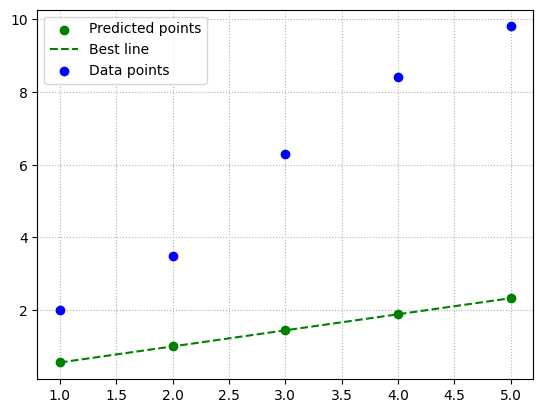

In [12]:
plt.scatter(x,y_pred, c= "green", label = "Predicted points", zorder = 3)
plt.plot([x[0],x[-1]],[y_pred[0],y_pred[-1]], c= "green", linestyle="--", label="Best line")
plt.scatter(x,y, c = "blue", label = "Data points", zorder = 2)
plt.legend()
plt.grid(linestyle=":", zorder = 1)

As shown in the plot, the line is moving closer to the actual data. <br>
Let's continue this training process for 1,000 epochs to ensure the weight and bias reach their most accurate values

In [119]:
n_iters = 1000
loss_history = []
tolerance = 1e-6

for i in range(n_iters):
  gradient_J_wrt_w  = (-2 / n)* np.sum(x * (y - y_pred))
  gradient_J_wrt_b  = (-2 / n)* np.sum(y - y_pred)
  w = w - a * gradient_J_wrt_w
  b = b - a * gradient_J_wrt_b

  y_pred = w * x + b
  loss = (1 / n) * (np.sum((y - y_pred) ** 2))
  loss_history.append(loss)
  print(f"y_pred: {y_pred} - loss: {loss} - w: {w} - b: {b}")
  if i > 0:
    loss_change = abs(loss_history[-2] - loss_history[-1])
    if loss_change <= tolerance:
      print(f"Converged at iteration {i}! Loss change: {loss_change}")
      break

y_pred: [0.562 1.004 1.446 1.888 2.33 ] - loss: 26.013244 - w: 0.44200000000000006 - b: 0.12000000000000002
y_pred: [0.99064 1.7702  2.54976 3.32932 4.10888] - loss: 15.2351916448 - w: 0.77956 - b: 0.21108000000000005
y_pred: [1.3174768 2.3548688 3.3922608 4.4296528 5.4670448] - loss: 8.95405365854464 - w: 1.037392 - b: 0.2800848
y_pred: [1.56660026 2.80096093 4.0353216  5.26968227 6.50404294] - loss: 5.2934962421871425 - w: 1.2343606720000002 - b: 0.33223958400000003
y_pred: [1.7564001  3.14126705 4.526134   5.91100095 7.2958679 ] - loss: 3.1600849385884198 - w: 1.3848669491200003 - b: 0.37153315200000003
y_pred: [1.9009147  3.40081893 4.90072317 6.4006274  7.90053163] - loss: 1.916620268379964 - w: 1.4999042311936002 - b: 0.40101047201280005
y_pred: [2.01086068 3.59872535 5.18659002 6.7744547  8.36231937] - loss: 1.1917739106184666 - w: 1.58786467201024 - b: 0.422996008700928
y_pred: [2.09441889 3.74957358 5.40472826 7.05988294 8.71503763] - loss: 0.7691540931551147 - w: 1.6551546836

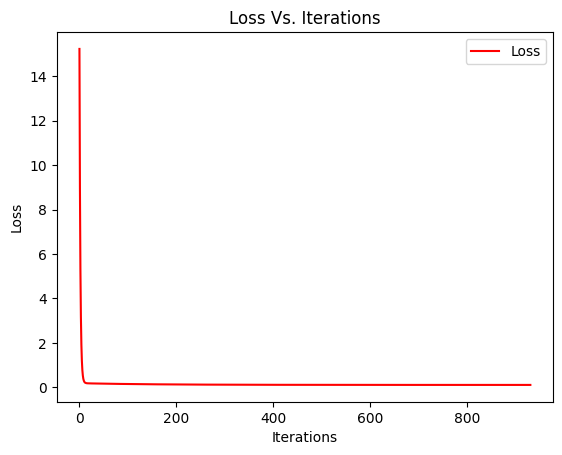

In [22]:
# Try to clear any corrupted 'plt' state
import matplotlib.pyplot as plt
plt.plot(range(len(loss_history)), loss_history, label = "Loss", c = "red")
plt.ylabel("Loss")
plt.xlabel("Iterations")
plt.title("Loss Vs. Iterations")
plt.legend();

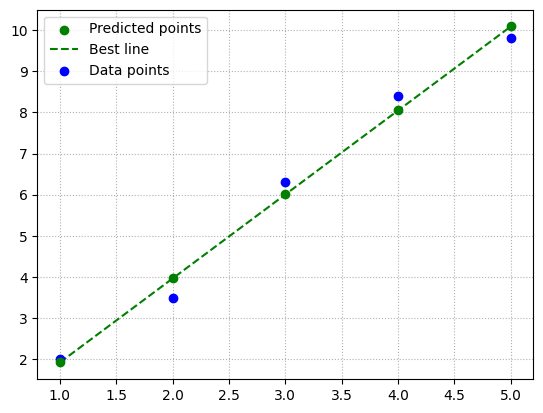

In [15]:
plt.scatter(x,y_pred, c= "green", label = "Predicted points", zorder = 3)
plt.plot([x[0],x[-1]],[y_pred[0],y_pred[-1]], c= "green", linestyle="--", label="Best line")
plt.scatter(x,y, c = "blue", label = "Data points", zorder = 2)
plt.legend()
plt.grid(linestyle=":", zorder = 1)

This is the best fit line according to MSE.

A margin of error remains in our prediction line. Let's quantify the loss to see where we stand.

In [90]:
#  numerical
loss = (1 / n) * (np.sum((y - y_pred) ** 2))
loss

np.float64(0.10314666443076295)

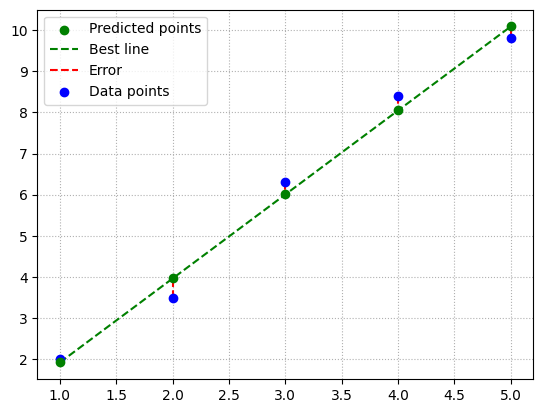

In [89]:
# Graphical Representation

plt.scatter(x,y_pred, c= "green", label = "Predicted points", zorder = 3)
plt.plot([x[0],x[-1]],[y_pred[0],y_pred[-1]], c= "green", linestyle="--", label="Best line")

for i in range(len(x)):
  if i == 1:
     plt.plot([x[i],x[i]],[y[i],y_pred[i]], c= "red", linestyle="--", label="Error")
  else:
    plt.plot([x[i],x[i]],[y[i],y_pred[i]], c= "red", linestyle="--")

plt.scatter(x,y, c = "blue", label = "Data points", zorder = 2)
plt.legend()
plt.grid(linestyle=":", zorder = 1)

## Overall Code

In [63]:
import numpy as np

class LinearRegression:
  '''
  Simple Linear Regression implemented from scratch using Gradient Descent

  Model:
    y = w * x + b
  '''

  def __init__(self, learning_rate = 0.01, n_iters = 1000):
    self.learning_rate = learning_rate
    self.n_iters = n_iters

    self.w = None
    self.b = None

  def fit(self, x,y):
    '''
    Train the linear regression model using gradient descent.

    Parameters
    -----------
    x : array-like, shape (n_samples,) or (n_samples, 1)
      Input feature.
    y : array-like, shape (n_samples,)
      Target values.
    '''

    x = np.array(x).reshape(-1)
    y = np.array(y).reshape(-1)

    n_samples = x.shape[0]

    self.w = 0.0
    self.b = 0.0

    for _ in range(self.n_iters):
      y_hat = self.w * x + self.b

      # Gradient (from math.md)
      dw = -(2 / n_samples) * np.sum(x * (y - y_hat))
      db = -(2 / n_samples) * np.sum(y - y_hat)

      self.w -= self.learning_rate * dw
      self.b -= self.learning_rate * db

    return self

  def predict(self,x):
    '''
    Predict target values using the trained model.

    Parameters
    ----------
    x : array-like, shape (n_samples,) or (n_samples, 1)

    Returns
    -------

    y_pred : ndarray, shape (n_samples,)
    '''

    x = np.asarray(x).reshape(-1)
    return self.w * x + self.b

  def score(self, x,y):
    '''
    Computer R^2 Score.

    Parameters:
    ----------
    x : array-like
    y : array-like

    Returns
    -------
    r2_score : float
    '''

    y = np.asarray(y).reshape(-1)
    y_pred = self.predict(x)

    ss_res = np.sum((y - y_pred) ** 2)
    ss_tot = np.sum((y - np.mean(y)) ** 2)

    r2 = 1 - (ss_res / ss_tot)

    return r2

## Compare with Scikit-learn

In [64]:
x = np.array([1,2,3,4,5])
y = np.array([2.0,3.5,6.3,8.4,9.8])

My model

In [65]:
model1 = LinearRegression()

model1.fit(x.reshape(-1,1),y)

score1 = model1.score(x.reshape(-1,1),y)

w1 = model1.w
b1 = model1.b

score1, w1, b1

(np.float64(0.9878828711500628),
 np.float64(2.0437548246882318),
 np.float64(-0.1274529355411207))

sklearn Model

In [66]:
from sklearn.linear_model import LinearRegression

model2 = LinearRegression()

model2.fit(x.reshape(-1,1),y)

score2 = model2.score(x.reshape(-1,1),y)
w2 = model2.coef_[0]
b2 = model2.intercept_

score2, w2, b2

(0.9878937470615891,
 np.float64(2.0500000000000007),
 np.float64(-0.15000000000000124))

comparison

In [67]:
score_difference = abs(score1 - score2)
weight_difference = abs(w1 - w2)
bias_difference = abs(b1 - b2)

score_difference, weight_difference, bias_difference

(np.float64(1.0875911526264659e-05),
 np.float64(0.006245175311768936),
 np.float64(0.02254706445888055))

In [68]:
print(f"Score difference: {(score_difference / score1) * 100}% ")
print(f"weight difference: {(weight_difference / w1) * 100}% ")
print(f"Bias difference: {(bias_difference / abs(b1)) * 100}% ")


Score difference: 0.0011009312787864476% 
weight difference: 0.30557360581260606% 
Bias difference: 17.690502272979106% 


The magnitude disparity between the optimized weight (w) and bias (b) is irrelevant; the performance metric of significance is the model's coefficient of determination ($R^{2}$ score).

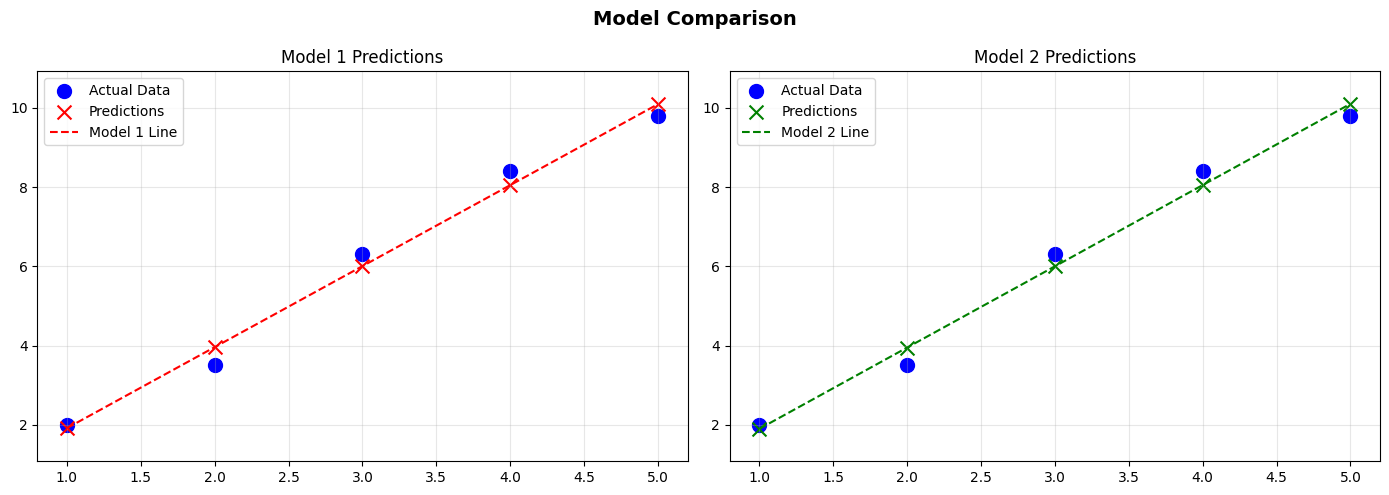

In [79]:
# Let's visualize my model and sklearn model.

y_pred_1 = model1.predict(x.reshape(-1,1))
y_pred_2 = model2.predict(x.reshape(-1,1))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Model 1
ax1.scatter(x, y, c='blue', s=100, label='Actual Data')
ax1.scatter(x, y_pred_1, c='red', s=100, marker='x', label='Predictions')
ax1.plot(x, y_pred_1, 'r--', label='Model 1 Line')
ax1.set_title('Model 1 Predictions', fontsize=12)
ax1.legend()
ax1.grid(True, alpha=0.3)

# Model 2
ax2.scatter(x, y, c='blue', s=100, label='Actual Data')
ax2.scatter(x, y_pred_2, c='green', s=100, marker='x', label='Predictions')
ax2.plot(x, y_pred_2, 'g--', label='Model 2 Line')
ax2.set_title('Model 2 Predictions', fontsize=12)
ax2.legend()
ax2.grid(True, alpha=0.3)

all_y_values = np.concatenate([y, y_pred_1, y_pred_2])
y_min, y_max = all_y_values.min(), all_y_values.max()

y_padding = (y_max - y_min) * 0.1
y_min -= y_padding
y_max += y_padding

ax1.set_ylim(y_min, y_max)
ax2.set_ylim(y_min, y_max)

plt.suptitle('Model Comparison', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

**Note:** Multiple Linear Regression is just like simple linear regression, except it uses many input variables instead of just one to make a prediction.
<br>
**Equation**: $y = w_1x_1 + w_2x_2 + ... + w_nx_n + b$

> Simple Linear Regression is a special case of Multiple Linear Regression.